# TPC1: Análise de dados: doença cardíaca

1) Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória;

In [1]:
def readToList():
    model = []
    file = open("myheart.csv", 'r')
    
    for row in (file.read()).split("\n"):
        model.append(row.split(","))
        
    model.pop(0)
    model.pop(-1)
    
    return model
    
print(readToList())

[['40', 'M', '140', '289', '172', '0'], ['49', 'F', '160', '180', '156', '1'], ['37', 'M', '130', '283', '98', '0'], ['48', 'F', '138', '214', '108', '1'], ['54', 'M', '150', '195', '122', '0'], ['39', 'M', '120', '339', '170', '0'], ['45', 'F', '130', '237', '170', '0'], ['54', 'M', '110', '208', '142', '0'], ['37', 'M', '140', '207', '130', '1'], ['48', 'F', '120', '284', '120', '0'], ['37', 'F', '130', '211', '142', '0'], ['58', 'M', '136', '164', '99', '1'], ['39', 'M', '120', '204', '145', '0'], ['49', 'M', '140', '234', '140', '1'], ['42', 'F', '115', '211', '137', '0'], ['54', 'F', '120', '273', '150', '0'], ['38', 'M', '110', '196', '166', '1'], ['43', 'F', '120', '201', '165', '0'], ['60', 'M', '100', '248', '125', '1'], ['36', 'M', '120', '267', '160', '1'], ['43', 'F', '100', '223', '142', '0'], ['44', 'M', '120', '184', '142', '0'], ['49', 'F', '124', '201', '164', '0'], ['44', 'M', '150', '288', '150', '1'], ['40', 'M', '130', '215', '138', '0'], ['36', 'M', '130', '209', 

2. Pense num modelo para guardar uma distribuição

The best option is probably a Dictonary.

3. Crie uma função que calcula a distribuição da doença por sexo

In [2]:
def distSS():
    lista = readToList()
    model = dict()
     
    for _, sex, _, _, _, sick in lista:
        if sick == "1":
            model["S-" + sex] = model.get("S-" + sex, 0) + 1
        else:
            model["H-" + sex] = model.get("H-" + sex, 0) + 1
    
    return model
    
print(distSS())

{'H-M': 242, 'S-F': 40, 'H-F': 129, 'S-M': 428}


4. Crie uma função que calcula a distribuição da doença por escalões etários. Considere os seguintes escalões: [30-34], [35-39], [40-44], ...

In [3]:
def maxAge():
    model = []
    
    for row in readToList():
        if int(row[0]) != 0 and row[-1] == "1":
            model.append(row)
    
    return max([row[0] for row in model])

def minAge():
    model = []
    
    for row in readToList():
        if int(row[0]) != 0 and row[-1] == "1":
            model.append(row)
    
    return min([row[0] for row in model])

print("Max Age: " + maxAge())
print("Min Age: " + minAge())

Max Age: 77
Min Age: 31


In [4]:
def distSA():
    lista = readToList()
    model = dict()
        
    ranges = []
    values = []
    model = dict()
    healthy = 0
    
    for row in readToList():
        if row[-1] == "1":
            values.append(int(row[0]))
    
    values.sort()
    
    for x in range(5 * round(values[0]/5), values[-1]+1, 5):
        ranges.append([x, x+4])
        
    for lower, upper in ranges:
        for v in values:
            if v <= upper:
                s = str(lower) + "-" + str(upper)
                model[s] = model.get(s, 0) + 1
                values.pop(0)
            else:
                break
        
    return model
    
print(distSA())

{'30-34': 3, '35-39': 11, '40-44': 19, '45-49': 35, '50-54': 59, '55-59': 87, '60-64': 94, '65-69': 69, '70-74': 43, '75-79': 24}


5. Crie uma função que calcula a distribuição da doença por níveis de colesterol. Considere um nível igual a um intervalo de 10 unidades, comece no limite inferior e crie os níveis necessários até abranger o limite superior

In [5]:
def minCol():
    model = []
    
    for row in readToList():
        if int(row[3]) != 0 and row[-1] == "1":
            model.append(row)
    
    return min([int(row[3]) for row in model])

def maxCol():
    model = readToList()
    
    for row in readToList():
        if row[-1] == "1":
            model.append(row)
    
    return max([int(row[3]) for row in model])

print("Max Col.: " + str(maxCol()))
print("Min Col.: " + str(minCol()))

Max Col.: 603
Min Col.: 100


In [6]:
def distSC():
    ranges = []
    values = []
    model = dict()
    
    for row in readToList():
        if int(row[3]) != 0 and row[-1] == "1":
            values.append(int(row[3]))
    
    values.sort()
    
    for x in range(values[0], values[-1]+1, 10):
        ranges.append([x, x+9])
        
    for lower, upper in ranges:
        for v in values:
            if v <= upper:
                s = str(lower) + "-" + str(upper)
                model[s] = model.get(s, 0) + 1
                values.pop(0)
            else:
                break
        
    return model
    
print(distSC())           

{'100-109': 1, '110-119': 2, '120-129': 2, '130-139': 1, '140-149': 2, '150-159': 2, '160-169': 4, '170-179': 7, '180-189': 8, '190-199': 9, '200-209': 14, '210-219': 22, '220-229': 23, '230-239': 24, '240-249': 22, '250-259': 20, '260-269': 22, '270-279': 20, '280-289': 23, '290-299': 19, '300-309': 15, '310-319': 12, '320-329': 8, '330-339': 8, '340-349': 6, '350-359': 4, '360-369': 2, '370-379': 1, '380-389': 2, '390-399': 2, '400-409': 2, '410-419': 1, '420-429': 1, '460-469': 1, '490-499': 1, '510-519': 1, '520-529': 1, '600-609': 1}


6. Crie uma função que imprime na forma de uma tabela uma distribuição

In [7]:
def toTab(dist):
    cells = []
    
    w = max([len(key) for key in dist.keys()]) + 2
    w2 = len(str(max(dist.values()))) + 2
    
    for header, value in list(dist.items()):
        w = len(header)
        v = str(value)
        s1 = "+ " + "-"*w + " + " + "-"*w2 + " +\n"
        s2 = "| " + header + " | " + v + " "*(w2-len(v)) + " |"
        cells.append(s1 + s2)
    
    cells[-1] += "\n+ " + "-"*w + " + " + "-"*w2 + " +\n"
    
    for cell in cells:
        print(cell)

7. Especifique um programa que ao executar apresenta as tabelas correspondentes às distribuições pedidas

In [8]:
toTab(distSS())
toTab(distSA())
toTab(distSC())

+ --- + ----- +
| H-M | 242   |
+ --- + ----- +
| S-F | 40    |
+ --- + ----- +
| H-F | 129   |
+ --- + ----- +
| S-M | 428   |
+ --- + ----- +

+ ----- + ---- +
| 30-34 | 3    |
+ ----- + ---- +
| 35-39 | 11   |
+ ----- + ---- +
| 40-44 | 19   |
+ ----- + ---- +
| 45-49 | 35   |
+ ----- + ---- +
| 50-54 | 59   |
+ ----- + ---- +
| 55-59 | 87   |
+ ----- + ---- +
| 60-64 | 94   |
+ ----- + ---- +
| 65-69 | 69   |
+ ----- + ---- +
| 70-74 | 43   |
+ ----- + ---- +
| 75-79 | 24   |
+ ----- + ---- +

+ ------- + ---- +
| 100-109 | 1    |
+ ------- + ---- +
| 110-119 | 2    |
+ ------- + ---- +
| 120-129 | 2    |
+ ------- + ---- +
| 130-139 | 1    |
+ ------- + ---- +
| 140-149 | 2    |
+ ------- + ---- +
| 150-159 | 2    |
+ ------- + ---- +
| 160-169 | 4    |
+ ------- + ---- +
| 170-179 | 7    |
+ ------- + ---- +
| 180-189 | 8    |
+ ------- + ---- +
| 190-199 | 9    |
+ ------- + ---- +
| 200-209 | 14   |
+ ------- + ---- +
| 210-219 | 22   |
+ ------- + ---- +
| 220-229 | 23   |
+ -

Extra: explore o módulo matplotlib e crie gráficos para as suas distribuições.

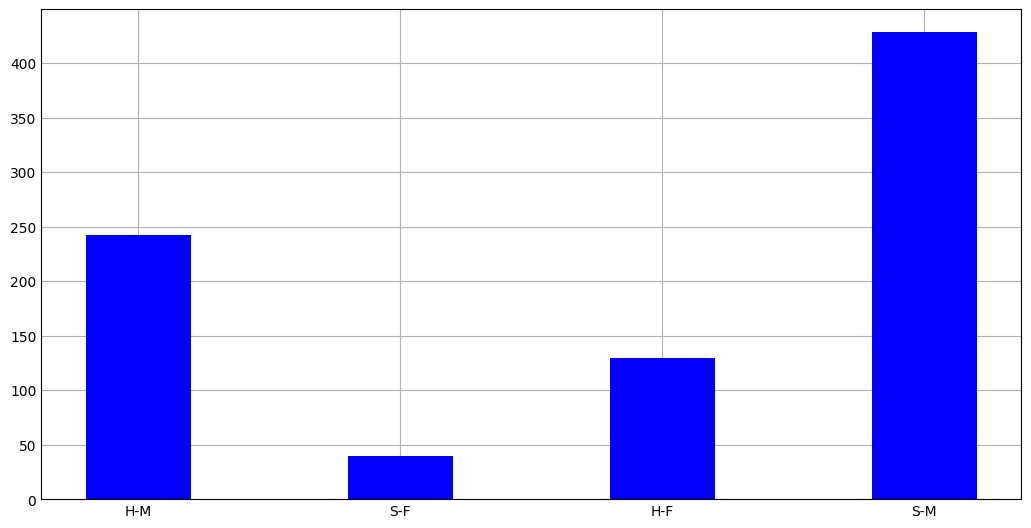

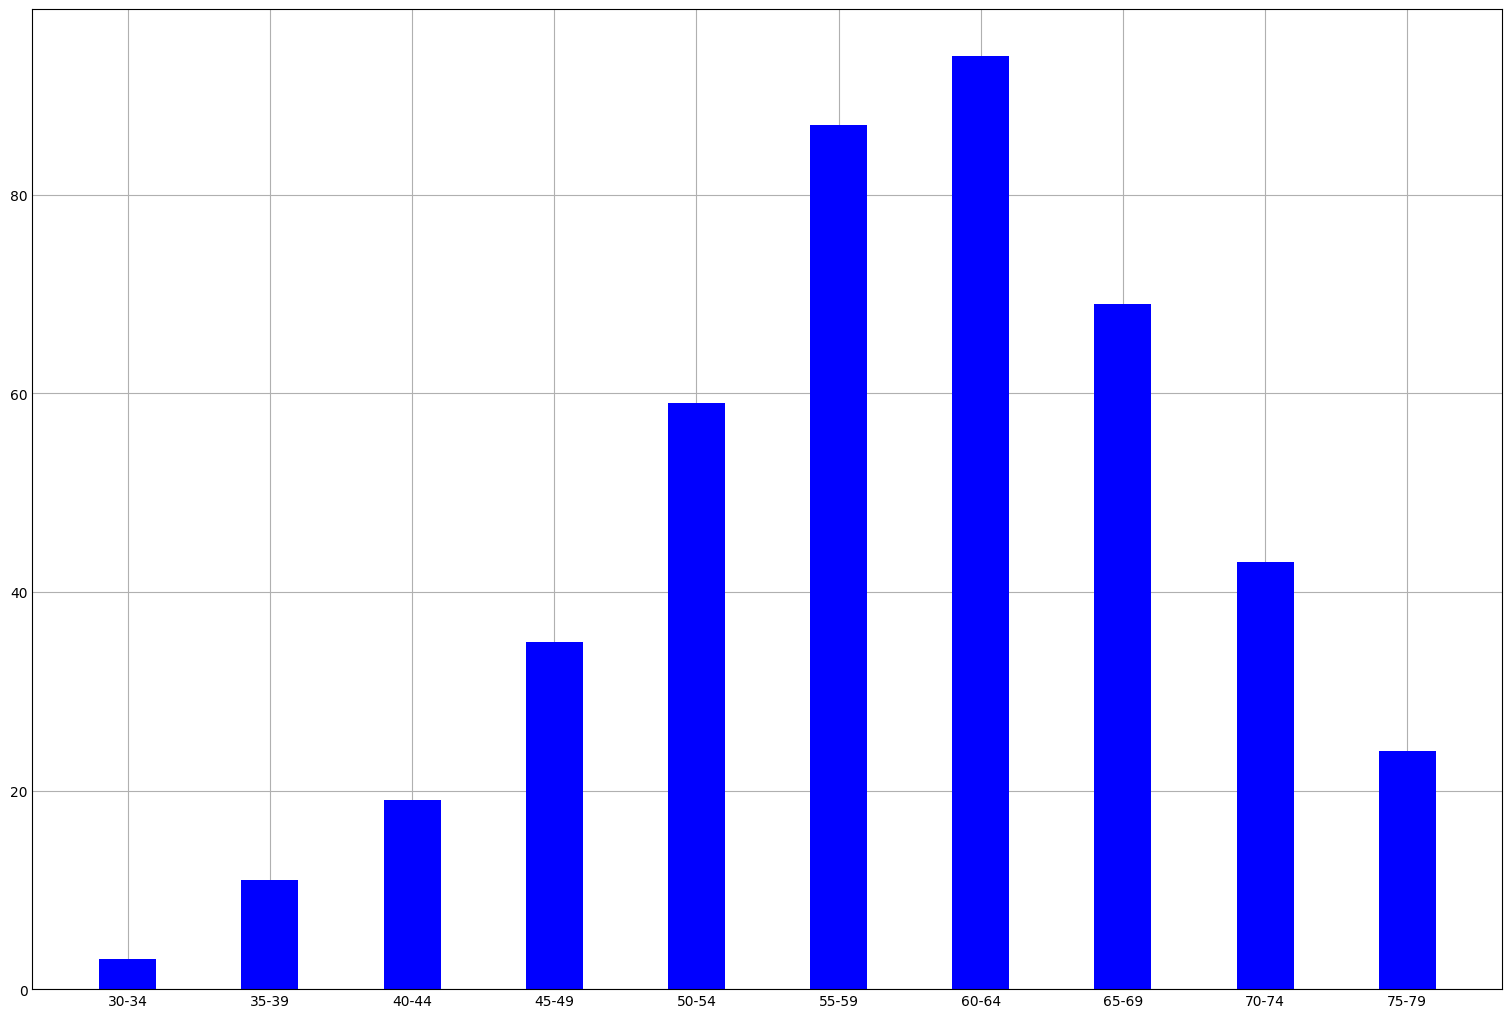

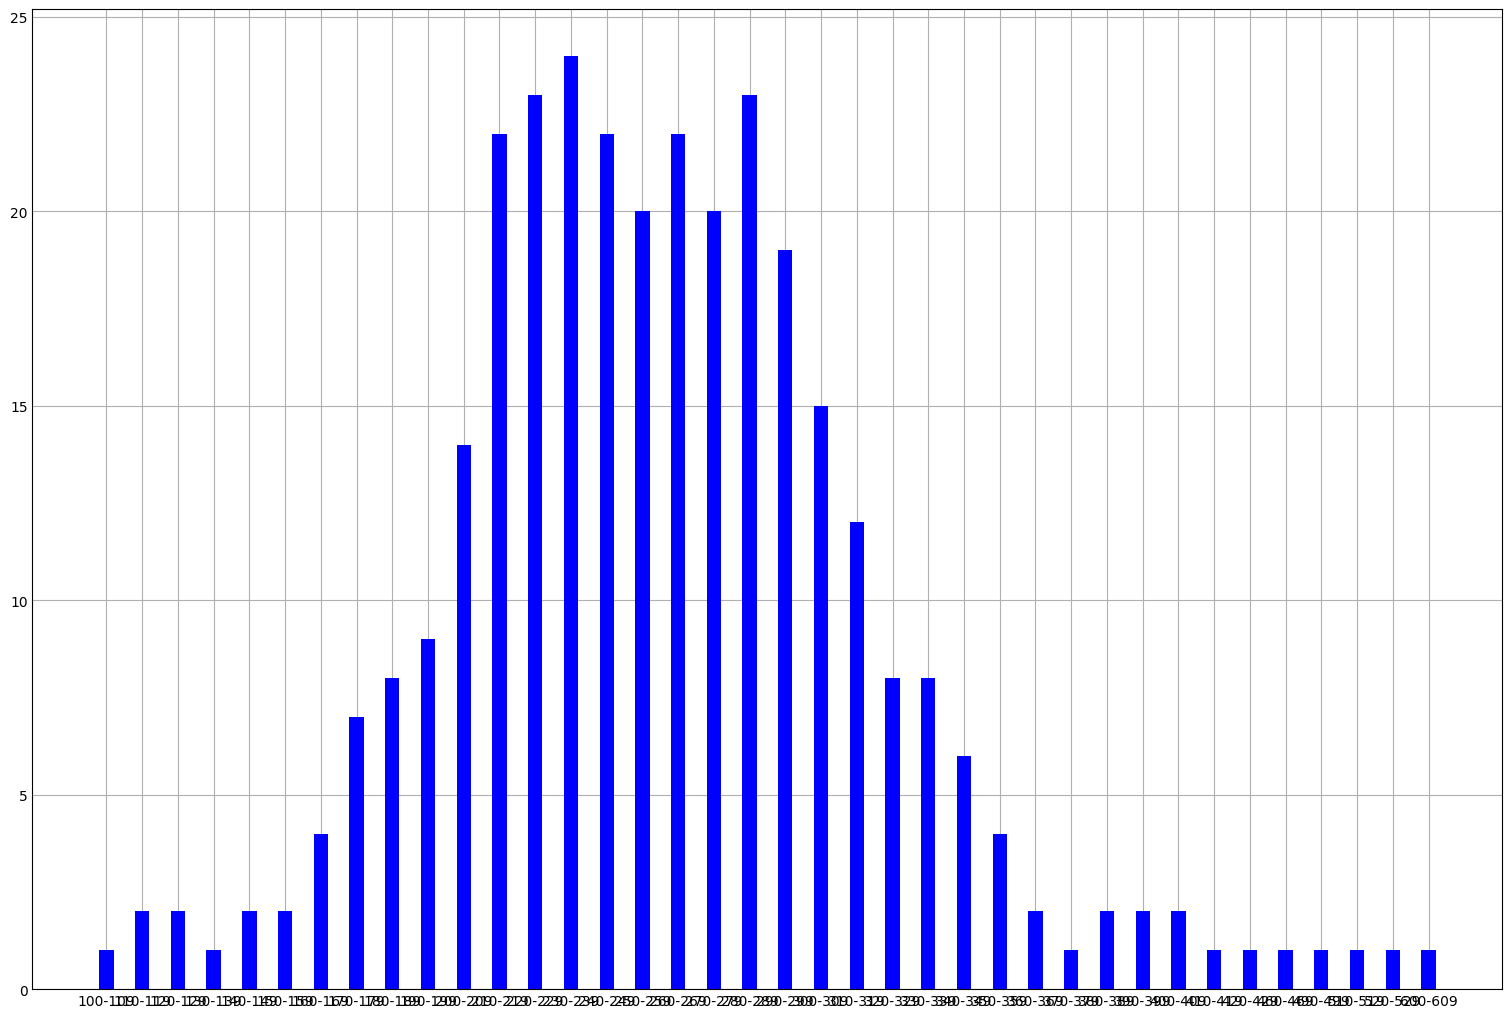

In [9]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

dist1 = distSS()
dist2 = distSA()
dist3 = distSC()

fig1 = plt.figure(figsize = (10, 5))

plt.bar(dist1.keys(), dist1.values(), color ='blue',
        width = 0.4)

plt.show()

fig1 = plt.figure(figsize = (15, 10))

plt.bar(dist2.keys(), dist2.values(), color ='blue',
        width = 0.4)

plt.show()

fig1 = plt.figure(figsize = (15, 10))

plt.bar(dist3.keys(), dist3.values(), color ='blue',
        width = 0.4)

plt.show()
